# P2棒球赛薪酬数据分析

## 一、项目简介
计划通过分析数据集中的Salaries.csv表，分析出球员的薪酬会受哪些因素的影响，如是否会受到年代、球员所在的联盟，球员所在的联队的影响。

## 二、熟悉数据
导入数据并通过查看数据的前五行和摘要信息了解数据，并发现一些异常数据。

In [1]:
#导入要用到的包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#导入数据
Salaries_df = pd.read_csv('Salaries.csv')
Pitching_df = pd.read_csv("Pitching.csv")

In [3]:
#了解前几行的数据
Salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
Pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [5]:
#了解薪酬数据的摘要信息
Salaries_df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


从数据中可以看出，该数据集包括从1985年到2016年的薪酬数据，薪酬的最低值为0，显然不合常理，需要在数据清洗的过程中修正，薪酬的最大值为3300万。

## 三、清洗数据
查看数据是否存在缺失字段和异常值，并修正数据

In [6]:
# 查看看哪些字段存在数据缺失的情况
Salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


该数据集不存在数据缺失的情况，但在数据数据时发现有球员的薪酬数据为0的记录，这里主要分析薪酬受其它三个因素的影响，因而需要修改该数据。

In [7]:
#显示薪酬为0的记录
Salaries_df[Salaries_df["salary"] == 0]

,yearID,teamID,lgID,playerID,salary
6179,1993,NYA,AL,jamesdi01,0
12007,1999,PIT,NL,martija02,0


可以看出这里有2条薪酬记录为0的记录，一般球员的薪酬不可能为0，由于去除这两天记录对整体影响不大，这里删除这两条记录。

In [8]:
Salaries_df = Salaries_df[(True^Salaries_df["salary"].isin([0]))]

In [9]:
#验证替换后是否还存在薪酬为0的记录
Salaries_df[Salaries_df["salary"] == 0]

,yearID,teamID,lgID,playerID,salary


In [10]:
#验证修正后的数据摘要信息
Salaries_df.describe()

,yearID,salary
count,26426.000000,2.642600e+04
mean,2000.879096,2.085792e+06
std,8.909512,3.455431e+06
min,1985.000000,1.090000e+04
25%,1994.000000,2.950000e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


## 四、探索数据

4.1 探索薪酬与年代的关系

In [11]:
#由于薪酬数据太大，先除以10000换算成以万为单位
Salaries_df['salary'] = Salaries_df['salary']/10000
#按年分组，求出每年的薪酬平均值
Salaries_groupby_year = Salaries_df.groupby('yearID')['salary'].mean()

In [12]:
Salaries_groupby_year

yearID
1985     47.629945
1986     41.714704
1987     43.472947
1988     45.317108
1989     50.632308
1990     51.197369
1991     89.496119
1992    104.752058
1993     97.802618
1994    104.958856
1995     96.497907
1996    102.790929
1997    121.868744
1998    128.084456
1999    148.679478
2000    199.298457
2001    227.984106
2002    239.252662
2003    257.347295
2004    249.177610
2005    263.383080
2006    283.452090
2007    294.143585
2008    313.651714
2009    327.764698
2010    327.874683
2011    331.883825
2012    345.842122
2013    372.334435
2014    398.044591
2015    430.127609
2016    439.640960
Name: salary, dtype: float64

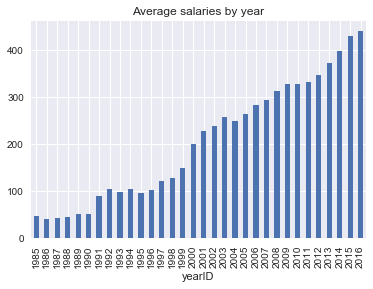

In [13]:
#按年柱状图
bar=Salaries_groupby_year.plot.bar(title='Average salaries by year')

从图中可以看出，随着年代的增加，球员的平均薪酬从1985年的47万美元逐渐增加到2016年的439万美元，增长了接近9倍。

4.2 探索薪酬与联盟的关系

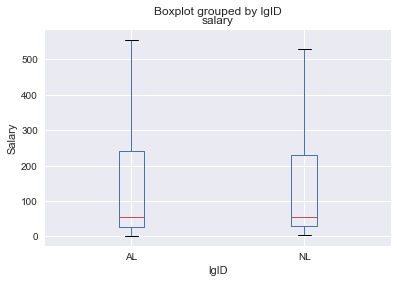

In [14]:
#展示按联盟分组的薪酬箱形图
Salaries_df.boxplot(by = 'lgID', column = 'salary',  showfliers = False)
plt.ylabel("Salary")

从图中可以看出，联盟对球员的薪酬影响关系不大，两个不同联盟球员薪酬的上下边缘，上下四分位和中位数都比较接近。

4.3 探索薪酬与球队的关系

In [15]:
#按Team分组
Salaries_groupby_teamID = Salaries_df.groupby('teamID')['salary'].mean()

In [16]:
Salaries_groupby_teamID

teamID
ANA    189.510920
ARI    252.179646
ATL    221.117631
BAL    202.883865
BOS    296.859120
CAL     73.907318
CHA    209.992913
CHC    531.267821
CHN    225.537971
CHW    451.994668
CIN    175.998677
CLE    165.120315
COL    213.386976
DET    238.656129
FLO    114.798640
HOU    178.801709
KCA    143.126969
KCR    453.403879
LAA    429.145367
LAD    632.252514
LAN    266.112658
MIA    260.682694
MIL    226.354329
MIN    173.369476
ML4     61.324358
MON     70.745886
NYA    385.432336
NYM    495.885663
NYN    238.704724
NYY    768.957903
OAK    144.027070
PHI    227.112743
PIT    126.975246
SDN    145.611378
SDP    375.647459
SEA    215.517352
SFG    689.015112
SFN    229.080524
SLN    207.771144
STL    461.462903
TBA    163.581947
TBR    203.918964
TEX    217.710286
TOR    201.388890
WAS    273.024292
WSN    544.817869
Name: salary, dtype: float64

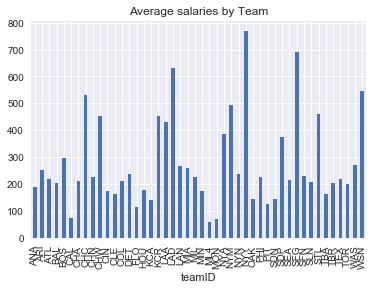

In [17]:
bar=Salaries_groupby_teamID.plot.bar(title='Average salaries by Team')

从图中可以看出，不同球队的平均薪酬差别比较大，球员平均薪酬最高的球队有NYY，SFG，LAD，平均超过600万美元，而平均薪酬最低的球队有ML4，MON，CAL，低于100万美元。

4.4 探索薪酬与球员技术指标(Pitching)的关系

In [18]:
#合并salaries和pitching表
Pitching_and_Salaries = pd.merge(Salaries_df, Pitching_df, on=['playerID', 'yearID', 'teamID'])

In [19]:
#熟悉合并后的表
Pitching_and_Salaries.head()

,yearID,teamID,lgID_x,playerID,salary,stint,lgID_y,W,L,G,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1985,ATL,NL,barkele01,87.0000,1,NL,2,9,20,...,1.0,3.0,1.0,0,335.0,1.0,55,NaN,NaN,NaN
1,1985,ATL,NL,bedrost01,55.0000,1,NL,7,15,37,...,6.0,6.0,5.0,0,907.0,0.0,101,NaN,NaN,NaN
2,1985,ATL,NL,campri01,63.3333,1,NL,4,6,66,...,11.0,4.0,5.0,0,569.0,23.0,72,NaN,NaN,NaN
3,1985,ATL,NL,dedmoje01,15.0000,1,NL,6,3,60,...,14.0,2.0,1.0,1,377.0,15.0,52,NaN,NaN,NaN
4,1985,ATL,NL,forstte01,48.3333,1,NL,2,3,46,...,4.0,1.0,0.0,0,253.0,19.0,22,NaN,NaN,NaN


根据运动员的薪酬值将运动员分为两组，即"High salary player" 和 "Low salary plaer"

In [20]:
Pitching_and_Salaries['group'] = map(lambda salary: "High salary player" if salary>2000 else "Low salary player", 
                                     Pitching_and_Salaries['salary'])

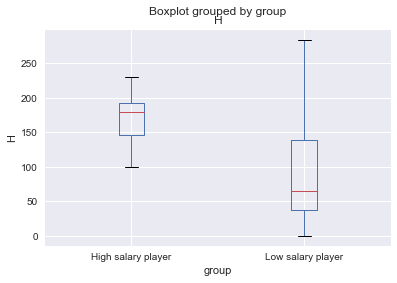

In [21]:
#画出H指标根据薪酬分组后的箱形图
Pitching_and_Salaries.boxplot(by = 'group', column = 'H',  showfliers = False)
plt.ylabel("H")

从图中可以看出，高收入运动员的H（击球）技术指标也高。高收入运动员击球数据的上下边缘，上下四分位和中位数均比低收入运动员高。

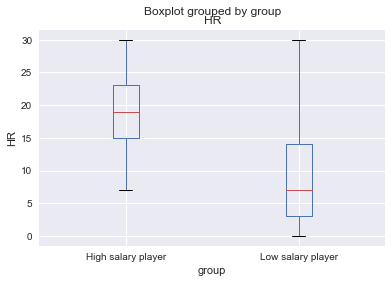

In [22]:
#画出HR指标根据薪酬分组后的箱形图
Pitching_and_Salaries.boxplot(by = 'group', column = 'HR',  showfliers = False)
plt.ylabel("HR")

从图中可以看出，高收入运动员的HR（全垒打）技术指标也高。高收入运动员全垒打数据的上下边缘，上下四分位和中位数均比低收入运动员高。

## 五、结论


从上面的分析可以看出，对球员薪酬影响最大的两个因素是年代，球员所在的球队，球员的技术指标如击球、全垒打。年代越接近现在，球员薪酬越高，从1985年到2016年，球员的薪酬增长了接近9倍；而不同球队的薪酬差距较大，最高的三个球队均超过600万，而最低的三个球队低于100万；高收入球员的技术指标如击球、全垒打数据普遍比低收入球员高。而球队所在的联盟对球员薪酬的影响不大。

## 六、分析的局限性
这里数据并不是根据重复试验得到的数据，分析并未表明或暗示球员的薪酬多少与年代、所在的球队、技术指标存在因果关系，而只能表明在这些记录中的相关性。

## 七、可能影响球员薪酬的其它因素
还有一些其它因素可能会影响到球员的薪酬，比如球员的比赛成绩，教育背景，球迷中的受欢迎程度等，当前分析未对这些因素进行分析。